<a href="https://colab.research.google.com/github/kimjuha0000/Stat_study/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

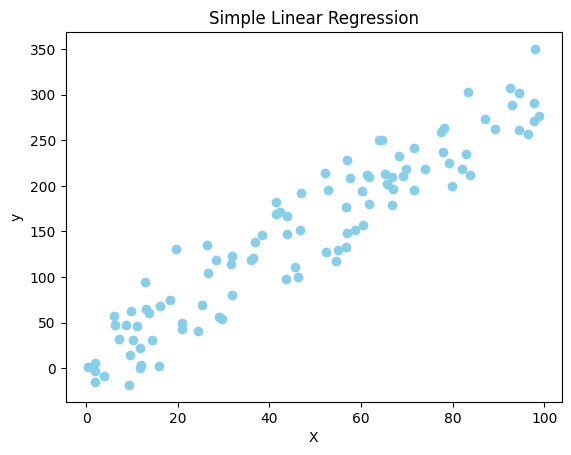

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 가상의 데이터 생성
np.random.seed(0)  # 결과의 일관성을 위해 시드 설정
X = np.random.rand(100, 1) * 100  # 독립 변수 (0~100 사이의 값 100개)
y = 3 * X + np.random.randn(100, 1) * 30  # 종속 변수 (기울기는 3, 잡음 추가)
X_sm = sm.add_constant(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

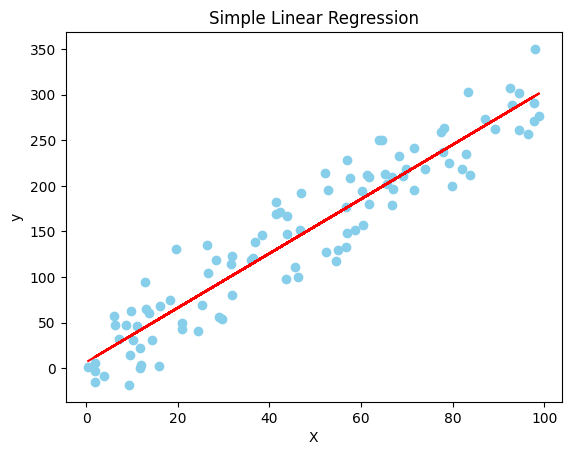

In [ ]:
# 예측 및 모델 평가
y_pred = model.predict(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.plot(X, y_pred, color='red')  # 회귀선
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# 상수항 추가
X_sm = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 생성 및 학습
model = sm.OLS(y, X_sm)
results = model.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.49e-49
Time:                        04:31:49   Log-Likelihood:                -481.63
No. Observations:                 100   AIC:                             967.3
Df Residuals:                      98   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6645      5.799      1.149      0.2

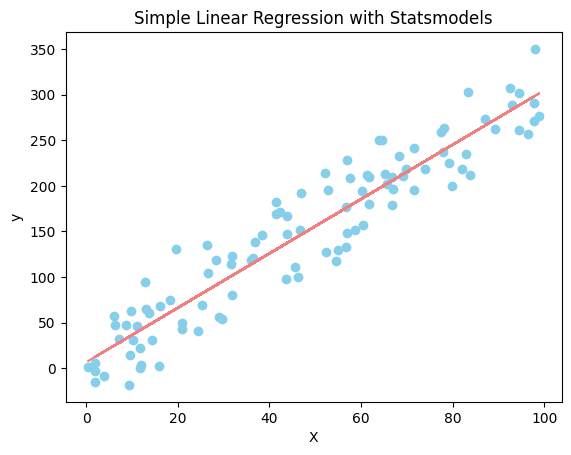

In [ ]:
# 요약 결과 출력
print(results.summary())

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도 (하늘색)
plt.plot(X, results.predict(X_sm), color='lightcoral')  # 회귀선 (밝은 주황색)
plt.title('Simple Linear Regression with Statsmodels')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

<Figure size 600x400 with 0 Axes>

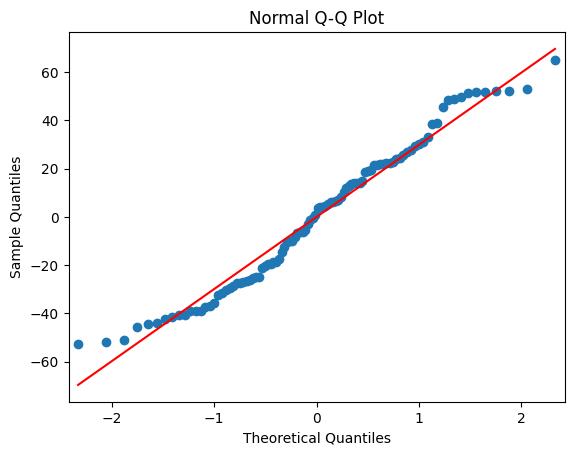

In [ ]:
from scipy import stats

# 잔차 계산
residuals = results.resid
# Q-Q Plot
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

# 잔차 계산
residuals = results.resid

# Breusch-Pagan 테스트
bp_test = het_breuschpagan(residuals, results.model.exog)
print("Breusch-Pagan Test:\nStatistic:", bp_test[0], "\np-Value:", bp_test[1])

Breusch-Pagan Test:
Statistic: 0.037989958447137706 
p-Value: 0.8454633043549205


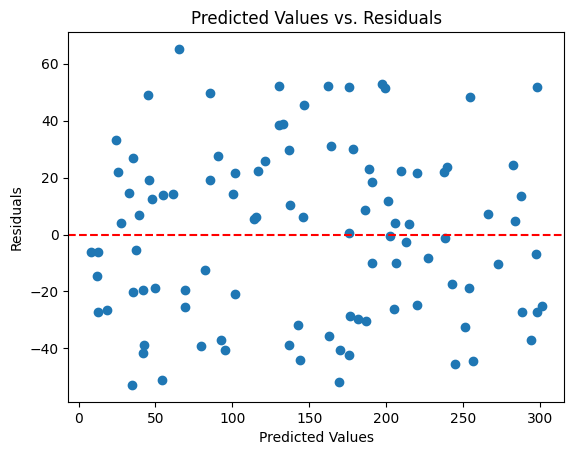

In [ ]:
predicted_values = results.predict(X_sm)
plt.scatter(predicted_values, results.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()